In [39]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Actividad 04: Errores y estabilidad

---
### Profesor: Juan Marcos Marín
### Nombre: Laura Camila Rios Quintero
*Métodos computacionales 2024-II*

---

#1. Serie Seno
Considere la serie de Taylor para el seno

$$\sin(x) = \sum^{\infty}_{n=1} (-1)^{n}\frac{x^{2n-1}}{(2n-1)!} $$

a. Defina una función que a partir de la *serie de Taylor* y un valor de $x$ en radianes encuentre el valor de $\sin(x)$.


b. Usando $x$ como `float32` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


c. Ahora, usando $x$ como `float64` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


d. Describa los errores porcentuales para cada cálculo y por qué pueden existir diferencias.

In [ ]:
# Aqui va su código
def taylor_seno(angulo,iteraciones):
    seno = 0
    for i in range(iteraciones):
        seno += (-1)**i* angulo**(2*i + 1)/ math.factorial(2*i +1)
    return seno

In [ ]:
x = np.deg2rad(30)
max_iter= 10
seno = taylor_seno(x, max_iter)
seno_real = np.sin(x)
print(f'el valor de Seno con {max_iter}, itereaciones es: {seno}')
print(f'El valor real será: {seno_real}')

print(seno == seno_real)

el valor de Seno con 10, itereaciones es: 0.49999999999999994
El valor real será: 0.49999999999999994
True


In [ ]:
# b # hasta cuantos terminos osn necesarios para que los terminos sean iguales
def taylor_seno32(angulo, tol):    #tol= tolerancia
    seno = 0
    real = math.sin(angulo)
    i = 0


    while abs(real - seno)>tol:
        seno += (-1)**i* angulo**(2*i + 1)/ math.factorial(2*i +1)
        i +=1
    return i, seno

In [ ]:
x = math.radians(80)
tol_ = np.finfo(np.float32).eps #epsilon de la maquina
N, seno = taylor_seno32(x, tol_)
print(f'Terminos: {N}')

Terminos 6 y 0.9848077408146284


In [ ]:
# c
def taylor_seno64(angulo, tol):
    seno = 0
    real = math.sin(angulo)
    i = 0

    while abs(real - seno)>tol:
        seno += (-1)**i* angulo**(2*i + 1)/ math.factorial(2*i +1)
        i+= 1
    return i, seno

In [ ]:
x= math.radians(40)
tol_ = np.finfo(np.float64).eps
N, seno = taylor_seno64(x, tol_)
print(f'Termionos: {N}')

Termionos: 8


In [ ]:
'''
def taylor_seno32(angulo, tol):    #tol= tolerancia
    seno = 0
    max_iter_= 100
    real = math.sin(angulo)
    i = 0
    errors= np.zeros(max_iter_) #guardar el error
    iteraciones = np.arange(max_iter_) #iteracion asociado al error

    while abs(real - seno)>tol:
        seno += (-1)**i* angulo**(2*i + 1)/ math.factorial(2*i +1)
        error = abs(real - seno)
        errors[i] = error
        i +=1
        if i > max_iter_:
            break
    return errors[:1],iteraciones[:i], seno

In [ ]:
'''
x = math.radians(80)
tol_ = np.finfo(np.float32).eps #epsilon de la maquina
er, N, seno = taylor_seno32(x, tol_)

#2. Serie Exponencial
Considere la serie para $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

a. Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}


b. Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

c. Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


d. Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, usa el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


e. Realiza una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [ ]:
# Aqui va su código
#a
def serie_exp(exponente, iteraciones):
    exp = 0
    for i in range(iteraciones):
        exp+= (-1)**i* exponente**i/ math.factorial(i)
    return(exp)

In [ ]:
x= 0.5
iter_max= 15
exp_exacto= np.exp(-x)
exp = serie_exp(x,iter_max)
print(f'El valor exacto es {exp_exacto} y el de la serie es {exp}')

El valor exacto es 0.6065306597126334 y el de la serie es 0.6065306597126333


In [ ]:
N = 0
tol = 1e-7
suma = 1
termino= suma

while abs(termino)>tol*abs(suma):
    termino = (-x)**N/ math.factorial(N)
    suma+=termino
    N+=1

print(f'Valor de N es {N} para un x = {x}')


Valor de N es 9 para un x = 0.5


In [ ]:
#b

def cancelacion(x, max):

    suma = 0

    for n in range(max+1):
         termino = (-x)**n/ math.factorial(n)
         suma+=termino
         print(f'en n: {n} el termino es {termino} y la suma de la serie es {suma}')

         if n== x-1:
            print(f'cancelacion casi perfecta en {n}')

In [ ]:
cancelacion(10,12)

en n: 0 el termino es 1.0 y la suma de la serie es 1.0
en n: 1 el termino es -10.0 y la suma de la serie es -9.0
en n: 2 el termino es 50.0 y la suma de la serie es 41.0
en n: 3 el termino es -166.66666666666666 y la suma de la serie es -125.66666666666666
en n: 4 el termino es 416.6666666666667 y la suma de la serie es 291.0
en n: 5 el termino es -833.3333333333334 y la suma de la serie es -542.3333333333334
en n: 6 el termino es 1388.888888888889 y la suma de la serie es 846.5555555555555
en n: 7 el termino es -1984.126984126984 y la suma de la serie es -1137.5714285714284
en n: 8 el termino es 2480.15873015873 y la suma de la serie es 1342.5873015873017
en n: 9 el termino es -2755.731922398589 y la suma de la serie es -1413.1446208112875
cancelacion casi perfecta en 9
en n: 10 el termino es 2755.731922398589 y la suma de la serie es 1342.5873015873017
en n: 11 el termino es -2505.210838544172 y la suma de la serie es -1162.6235369568703
en n: 12 el termino es 2087.67569878681 y la s

In [ ]:
#c

def comparacion(x, N):

    valor_serie = serie_exp(x, N)    #serie original

    otra_forma = 1/(np.exp(x))

    valor_exacto = np.exp(-x)

    print(f"Para x = {x}:")
    print(f"Serie de e^(-x): {valor_serie}")
    print(f"Usando 1/e^x: {otra_forma}")
    print(f"Valor exacto: {valor_exacto}")


In [ ]:
comparacion(15,25)

Para x = 15:
Serie de e^(-x): 10270.209370813067
Usando 1/e^x: 3.059023205018258e-07
Valor exacto: 3.059023205018258e-07


In [ ]:
def presicion(min,max,incremento, N ):

    for x in np.arange(min,max+incremento,incremento):

        valor_serie = serie_exp(x, N)
        valor_exacto = np.exp(-x)
        diferencia = abs(valor_serie - valor_exacto)

        print(f"{x} {valor_serie} {valor_exacto} {diferencia}")

In [ ]:
presicion(1,10,1,30)

1 0.36787944117144245 0.36787944117144233 1.1102230246251565e-16
2 0.13533528323661276 0.1353352832366127 5.551115123125783e-17
3 0.049787068367863986 0.049787068367863944 4.163336342344337e-17
4 0.018315638888730595 0.01831563888873418 3.5839387013680835e-15
5 0.006737946895921977 0.006737946999085467 1.0316348990346835e-10
6 0.0024807955133326386 0.0024787521766663585 2.0433366662801072e-06
7 0.0013964744051219832 0.0009118819655545162 0.000484592439567467
8 -0.04823026065674041 0.00033546262790251185 0.04856572328464292
9 -6.037310730001098 0.00012340980408667956 6.037434139805185
10 127.05562505307003 4.5399929762484854e-05 127.05557965314027


<ipython-input-2-0363a6962df6>:6: RuntimeWarning: overflow encountered in scalar multiply
  exp+= (-1)**i* exponente**i/ math.factorial(i)


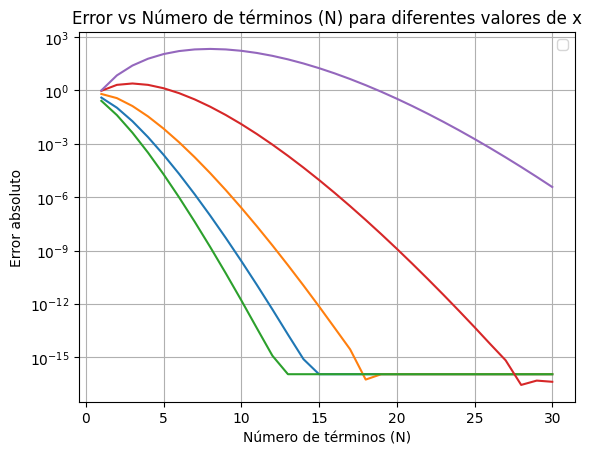

In [40]:
#e

def errores(x, Nmax):
    errores = []
    valor_exacto = np.exp(-x)
    for N in range(1, Nmax + 1):
        valor_serie = serie_exp(x,N)
        error = abs(valor_serie - valor_exacto)
        errores.append(error)
    return errores

valores_x = [0.5, 1, 0.3, 3, 8]
Nmax= 30

for x in valores_x:
    errores_ = errores(x,Nmax)

    plt.plot(range(1, Nmax + 1), errores_)

plt.yscale('log')
plt.xlabel('Número de términos (N)')
plt.ylabel('Error absoluto')
plt.title('Error vs Número de términos (N) para diferentes valores de x')
plt.legend()
plt.grid(True)
plt.show()

# 3. Serie $S_N$

Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados númericos  pueden tener diferencias.


a.  Escribir tres funciones para que realicen el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$


b. Estudiar la convergencia de la serie para los tres casos.


c. Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $$E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|,$$ $i = 1, 2$. Considere valores de $N = 1\times 10^{6}$.

d. Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

In [41]:
# a
def S_N_1(N):

    suma= 0
    for n in range(1, 2 * N + 1):
        suma+= ((-1)**n * n / (n + 1))
    return suma

def S_N_2(N):
    sum_impares = 0
    sum_pares = 0
    for n in range(1, N + 1):
        sum_impares+=((2 * n - 1) / (2 * n))
        sum_pares+=((2 * n) / (2 * n + 1))
    return -sum_impares + sum_pares

def S_N_3(N):
    sum=0
    for n in range(1, N + 1):

        sum+= (1 / (2 * n * (2 * n + 1)))
    return sum

In [42]:
#b

valores_N = range(1,70)

valores_suma1 =[]
valores_suma2 = []
valores_suma3 = []

for N in valores_N:

    termino = S_N_1(N)
    valores_suma1.append(termino)
    termino_ = S_N_2(N)
    valores_suma2.append(termino_)
    termino__ = S_N_3(N)
    valores_suma3.append(termino__)


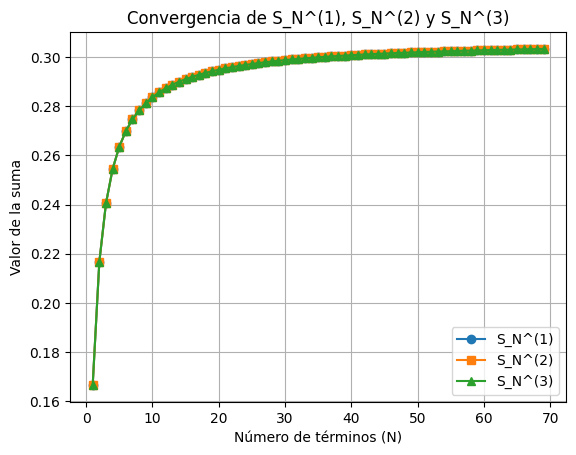

In [43]:
plt.plot(valores_N, valores_suma1, label='S_N^(1)', marker='o')
plt.plot(valores_N, valores_suma2, label='S_N^(2)', marker='s')
plt.plot(valores_N, valores_suma3, label='S_N^(3)', marker='^')


plt.xlabel('Número de términos (N)')
plt.ylabel('Valor de la suma')
plt.title('Convergencia de S_N^(1), S_N^(2) y S_N^(3)')
plt.legend()
plt.grid(True)
plt.show()

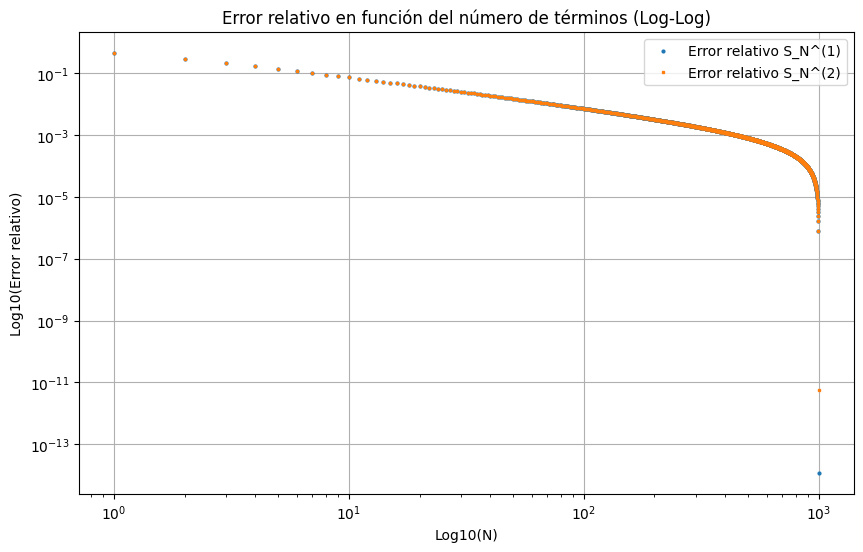

In [47]:
#c

Valores_N = np.arange(1, 1000)
errors_1 = []
errors_2 = []


solucion_excata = S_N_3(max(Valores_N))

for N in Valores_N:
    S1 = S_N_1(N)
    S2 = S_N_2(N)
    E1 = abs((S1 - solucion_excata) / solucion_excata)
    E2 = abs((S2 - solucion_excata) / solucion_excata)

    errors_1.append(E1)
    errors_2.append(E2)


log_errors_1 = np.log10(errors_1)
log_errors_2 = np.log10(errors_2)
log_N_valores = np.log10(Valores_N)

# Graficar en log-log
plt.figure(figsize=(10, 6))
plt.loglog(Valores_N, errors_1, label='Error relativo S_N^(1)', marker='o', linestyle='None', markersize=2)
plt.loglog(Valores_N, errors_2, label='Error relativo S_N^(2)', marker='s', linestyle='None', markersize=2)

plt.xlabel('Log10(N)')
plt.ylabel('Log10(Error relativo)')
plt.title('Error relativo en función del número de términos (Log-Log)')
plt.legend()
plt.grid(True)
plt.show()